# Principal Component Analysis: Boston Housing Data

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

There are 13 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population

Target variable is the Median Value/price of the owner occupied home

In [14]:
# Importing the relevant packages
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sb  
#for plotting heatmaps
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [1]:
# Importing the dataset
from sklearn.datasets import load_boston
load_data = load_boston()
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [2]:
feature_name = load_data['feature_names']
feature_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
# Adding the target variable name to the feaures
features = ['target']
features.extend(feature_name)
features

['target',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [5]:
# Checking the X and y variable
import pandas as pd
import numpy as np
boston_data = pd.DataFrame(data= np.c_[load_data['target'], load_data['data']],
                     columns= features )
boston_data.head()

target     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    34.7  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    33.4  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    36.2  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

### Analyzing the Data using Data Prep

In [121]:
#!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

  0%|          | 0/2138 [00:00<?, ?it/s]

DataPrep Report
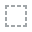
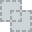
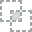
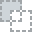
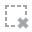
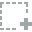
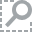
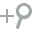
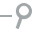
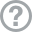
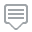
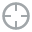
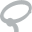
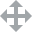
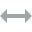
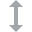
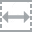
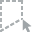
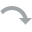
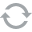
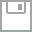
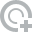
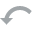
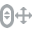
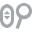
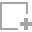
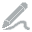
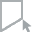
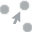
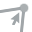
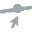

In [123]:
create_report(boston_data)

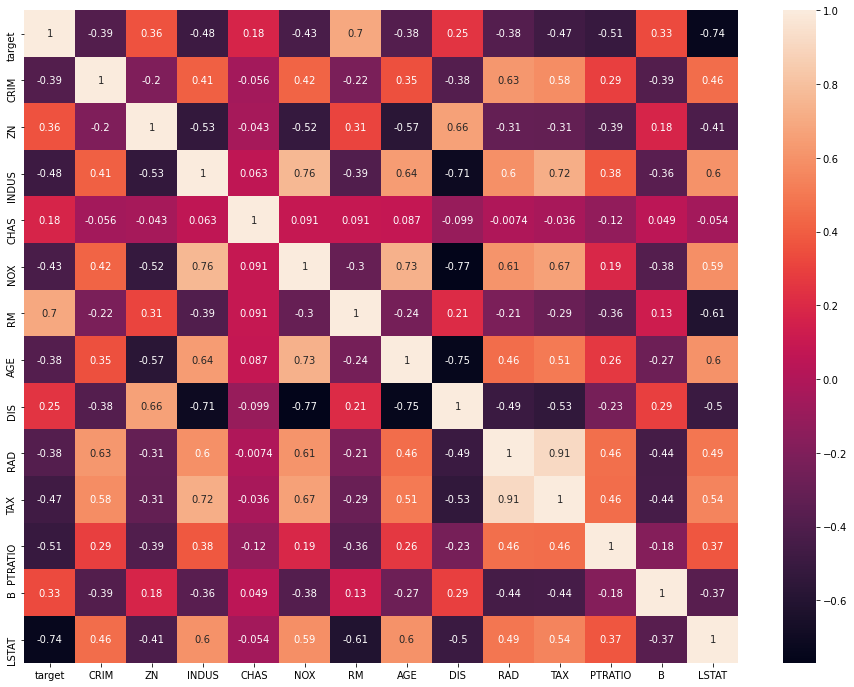

In [17]:
# Lets look at the correlation matrix of our data.
import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(boston_data.corr(),annot=True)

Thus we see that there are many variables which are correlated to each other. 

The issue here is, that there is a lot of collinearity between our predictor variables, for example DIS is highly correlated to INUDS, INOX and AGE and LSAT is highly correlated with RM.

This leads to multicollinearity in the variables which can make any Linear Regression Model unstable

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

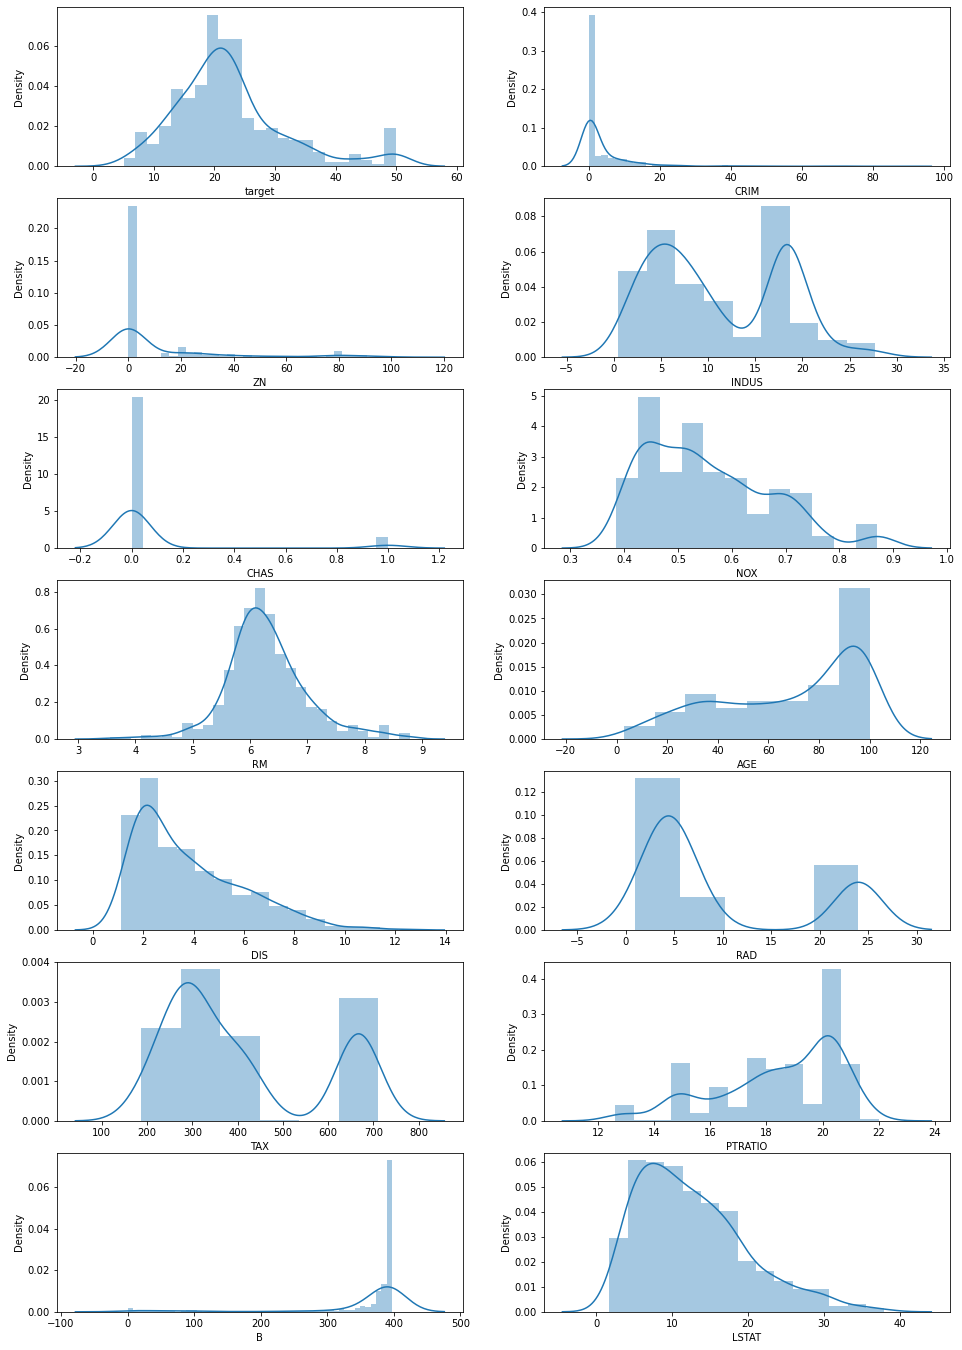

In [18]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))

for i in boston_data.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(boston_data[i],ax=ax)

Except Target and RM, nothing else is normally distributed, this might be an issue, as most statistical assumptions hold true only when our data is normally distributed.

#### Normalizing the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the Scaler
scaler.fit(boston_data)

# Transforming the Data using the above fitted scaler
scaled_data = scaler.transform(boston_data)
scaled_data

array([[ 0.15968566, -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.10152429, -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.32424667, -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 0.14880191, -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.0579893 , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-1.15724782, -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
# Converting the array into dataframe
scaled_df = pd.DataFrame(scaled_data, columns = [boston_data.columns])
scaled_df.head()

target      CRIM        ZN     INDUS      CHAS       NOX        RM  \
0  0.159686 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672   
1 -0.101524 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274   
2  1.324247 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714   
3  1.182758 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303   
4  1.487503 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577   

        AGE       DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

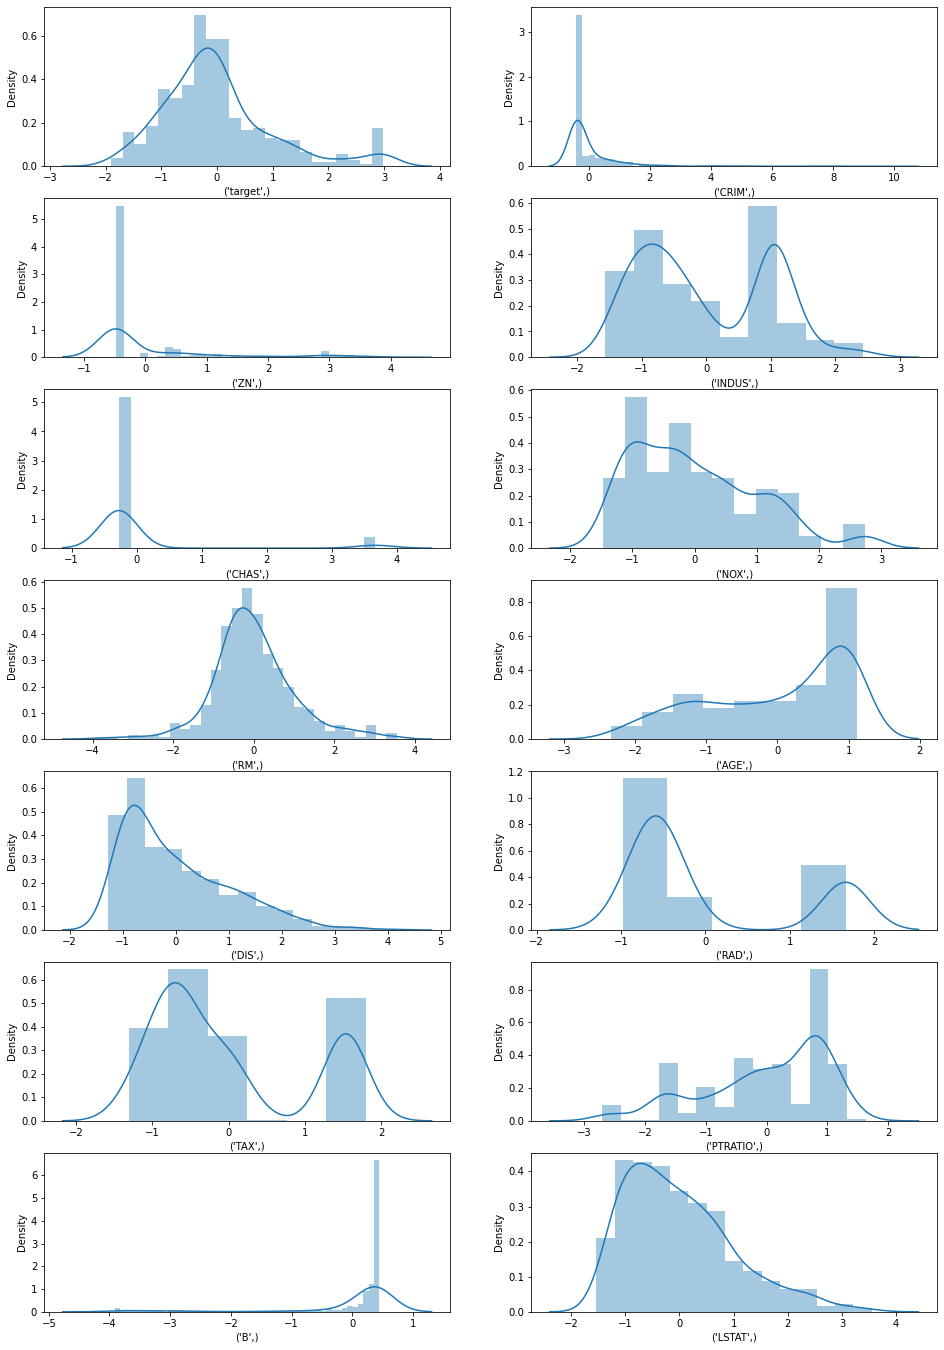

In [20]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))

for i in scaled_df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(scaled_df[i],ax=ax)

Thus we see that scaling the variables with Standard Scaler has shifted the mean to 0 in all the variables distribution.

#### Splitting the Data into Train and Test

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled_data, test_size=0.30, random_state=42)
print("Size of train data is ", train.shape)
print("Size of train data is ", test.shape)

Size of train data is  (354, 14)
Size of train data is  (152, 14)


#### Performing PCA

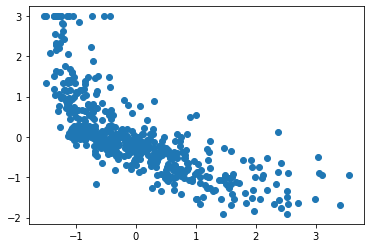

In [58]:
# Visualizing the Data
plt.scatter(scaled_df['LSTAT'], scaled_df['target'])

In [26]:
# Inititalizing the PCA class
myPCA = PCA( n_components = 14)

# Fitting the data
x = myPCA.fit(train)


print("Variance explained by Components are:", x.explained_variance_)
print("Percent Variance explained by Components are:", x.explained_variance_ratio_)
print("Cumulative Percent Variance Explained by Components are:", np.cumsum(x.explained_variance_ratio_))

Variance explained by Components are: [6.40202454 1.79963679 1.30781033 0.94793824 0.85598518 0.66244676
 0.51029569 0.40295912 0.28239156 0.24732519 0.2155295  0.1872655
 0.13753596 0.06081782]
Percent Variance explained by Components are: [0.45663636 0.12836246 0.09328202 0.06761347 0.06105474 0.04725025
 0.03639779 0.02874181 0.02014211 0.01764093 0.01537304 0.01335706
 0.00981001 0.00433794]
Cumulative Percent Variance Explained by Components are: [0.45663636 0.58499882 0.67828084 0.7458943  0.80694905 0.8541993
 0.89059709 0.9193389  0.93948101 0.95712194 0.97249498 0.98585205
 0.99566206 1.        ]


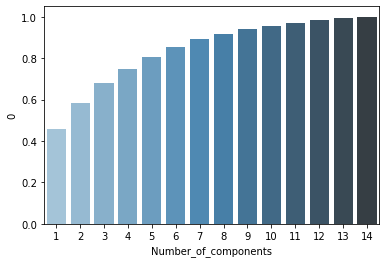

In [43]:
# Ploting the number of Components and their Cumulative Percent Variance Explained
Cum_Var_Exp = pd.DataFrame(np.cumsum(x.explained_variance_ratio_))
Cum_Var_Exp['Number_of_components'] = range(1, 15)
sns.barplot(x= "Number_of_components", y= 0 , data=Cum_Var_Exp,  palette="Blues_d")

From above we see that 6 Components is fine as they explain 85% of the variation in the data

#### Fitting the PCA with 6 Components

In [93]:
# Inititalizing the PCA class
myPCA = PCA( n_components = 6)

# Fitting the data
pca = myPCA.fit(train)

In [150]:
# Finding the loadings of the PCA
loadings = pca.components_.T

# Converting the Loadings to a dataframe
loadings_df = pd.DataFrame(loadings)
loadings_df.columns = ['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6']
loadings_df.index = boston_data.columns
loadings_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
target  -0.245758  0.173030  0.461033 -0.101861 -0.003883  0.129075
CRIM     0.269260  0.384386 -0.143036  0.183985  0.050683  0.675931
ZN      -0.248690  0.462191 -0.130145  0.215519 -0.564565 -0.075897
INDUS    0.316629 -0.068772  0.108249 -0.081677 -0.179358 -0.265270
CHAS    -0.004495 -0.263647  0.269458  0.665723 -0.149446 -0.263113
NOX      0.314994 -0.022271  0.232965  0.044201 -0.135769 -0.075150
RM      -0.168263  0.299823  0.507323 -0.180910  0.135972  0.006509
AGE      0.313842 -0.196040  0.248910  0.001953 -0.167633  0.221038
DIS     -0.286207  0.142819 -0.407731  0.104065 -0.078957 -0.192179
RAD      0.306775  0.345797  0.057632 -0.175844 -0.187757 -0.160493
TAX      0.331026  0.260517 -0.006052 -0.185349 -0.271095 -0.283000
PTRATIO  0.178545 -0.094946 -0.292342 -0.366272  0.178181 -0.200641
B       -0.246688 -0.412972 -0.004524 -0.397798 -0.627993  0.309728
LSTAT    0.317197 -0.134995 -0.192442  0.237232 -0.134366  0.218138

In [151]:
# Getting the Component Scores for the data
scores = myPCA.fit_transform(train)

# Creating a DataFrame
scores_df = pd.DataFrame(scores)
scores_df.columns = ['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6']
scores_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0   -2.243831 -0.443103 -0.374934  0.375239 -0.911359 -0.310393
1    0.034394  0.010470 -0.782398 -0.114072 -0.332297  0.164729
2   -1.488552 -1.395837 -0.948222  0.416785 -0.012290 -0.174383
3   -0.947217 -1.078176 -0.265042  0.993946 -0.965714 -0.380791
4    2.661348 -0.514891  1.274982  0.434682 -0.294797  0.886626
..        ...       ...       ...       ...       ...       ...
349  0.785734 -0.739420 -1.240391  0.611722 -0.769643 -0.078138
350 -1.383171 -1.292504 -0.700034  0.282148  0.130203 -0.102521
351 -3.704958 -1.489509  1.374793 -0.265271  1.214400  0.376560
352  4.020538  0.094381  1.538427 -1.168885  0.118996 -1.566361
353  0.767495 -0.445510  0.263608 -0.733731 -0.734598 -3.169539

[354 rows x 6 columns]

#### Biplot between the PCA 1 and PCA 2

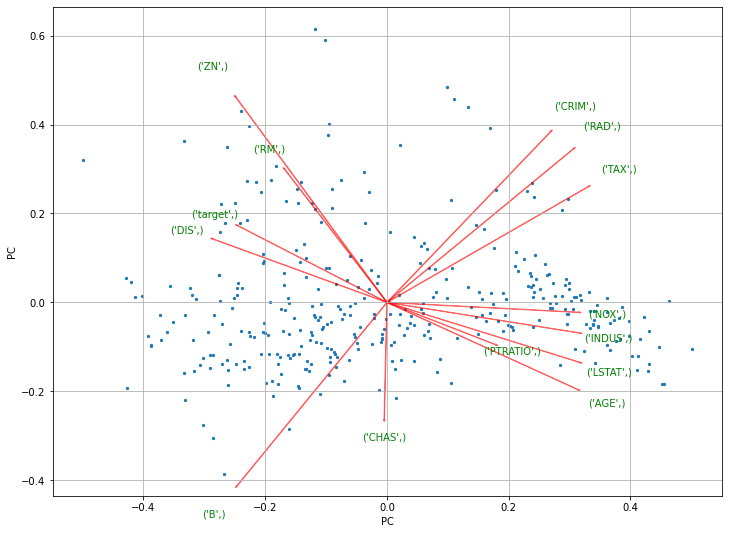

In [152]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
#     plt.xlabel("PC{}".format(1))
#     plt.ylabel("PC{}".format(2))
    plt.xlabel("PC")
    plt.ylabel("PC")
    plt.grid()

a4_dims = (12, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = myplot(scores[:,0:2], loadings[:, 0:2],list(scaled_df.columns))
plt.show()

The above plot shows the BiPlot between the Principal Component1 and Principal Component2 :
1. Below Variables are highly Correlated:
- Target and RM
- Age and Nox
- RAD and Tax
These results can be verified from the Correlation Heatmap as well.

2. The PCA1 has a large positive loadinds with NOX, INDUS, RAD, TAX, CRIM. Thus it basically measures the outside factors or the house. Factors which affect the locality of the house and not the house as such.

3. PCA2 has a high positive loading with the CHAS, target and RM. Thus it might be looking at the House characteristics in General and whether its near to CHAS river or not.

4. Further we can also see that there are two cluster of houses in the area.

5. We can also see few outliers in the top right corner and bottom middle.

#### Bi Plot between PCA 2 and PCA 3

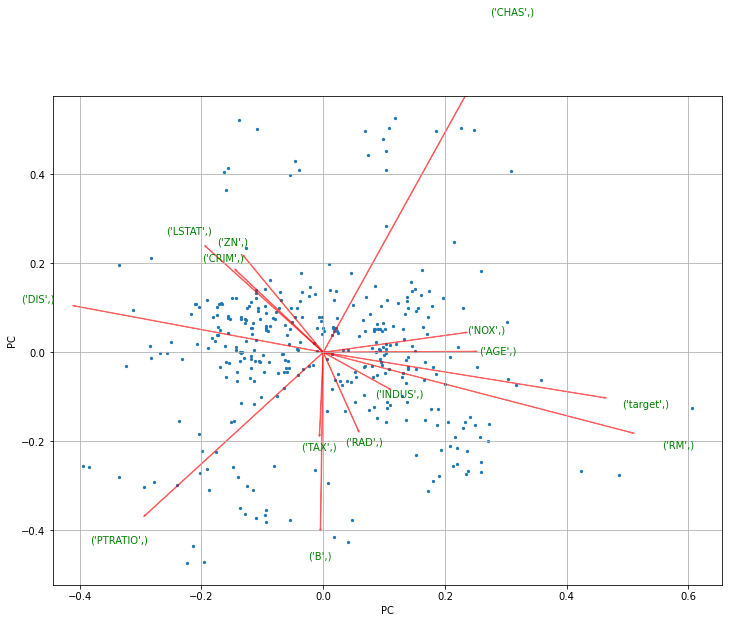

In [153]:
a4_dims = (12, 9)
fig, ax = plt.subplots(figsize=a4_dims)
ax = myplot(scores[:,2:4], loadings[:, 2:4],list(scaled_df.columns))
plt.show()

#### Components Loadings are Othronormal (Orthogonal + Unit Vecotrs)

In [154]:
# Finding the Dot product between the various Loadings
np.dot(loadings.T, loadings).round(2)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  1., -0.,  0., -0.],
       [ 0.,  0., -0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  0.,  1.,  0.],
       [ 0.,  0., -0., -0.,  0.,  1.]])

Thus the loadings are orthogonal.

In [155]:
loadings_df.corr().round(2)

PCA1  PCA2  PCA3  PCA4  PCA5  PCA6
PCA1  1.00 -0.08 -0.06  0.00  0.22 -0.00
PCA2 -0.08  1.00 -0.05  0.00  0.17 -0.00
PCA3 -0.06 -0.05  1.00  0.00  0.13 -0.00
PCA4  0.00  0.00  0.00  1.00 -0.01  0.00
PCA5  0.22  0.17  0.13 -0.01  1.00  0.01
PCA6 -0.00 -0.00 -0.00  0.00  0.01  1.00

Correlation Matrix is 1 only when we center our loadings, because dot product of two matrix is equal to correlation only when we have centered matrix. But there is no reason to normalize them. 

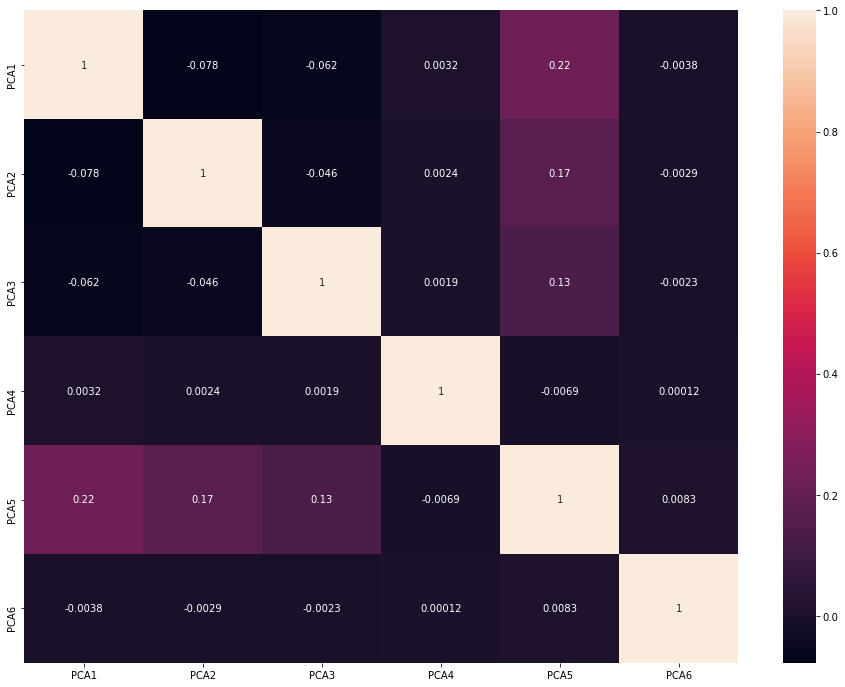

In [156]:
# Finding the Correlation between the various PCA Loadings
import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(loadings_df.corr(),annot=True)

Thus from Above we that the dot product between the loadings is 0 and there is no correlation between the various Principal Components. This resolves the problem of Multicolllinearity in our data as we saw earlier.

Thus the PCA Loadings are Orthogonal

#### Component Scores are Orthorgonal

In [159]:
np.dot(scores.T, scores).round(2)

array([[2259.91,   -0.  ,   -0.  ,    0.  ,   -0.  ,   -0.  ],
       [  -0.  ,  635.27,   -0.  ,    0.  ,   -0.  ,   -0.  ],
       [  -0.  ,   -0.  ,  461.66,   -0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,   -0.  ,  334.62,    0.  ,    0.  ],
       [  -0.  ,   -0.  ,    0.  ,    0.  ,  302.16,    0.  ],
       [  -0.  ,   -0.  ,    0.  ,    0.  ,    0.  ,  233.84]])

In [157]:
scores_df.corr().round(2)

PCA1  PCA2  PCA3  PCA4  PCA5  PCA6
PCA1   1.0  -0.0  -0.0   0.0  -0.0  -0.0
PCA2  -0.0   1.0  -0.0   0.0  -0.0  -0.0
PCA3  -0.0  -0.0   1.0  -0.0   0.0   0.0
PCA4   0.0   0.0  -0.0   1.0   0.0   0.0
PCA5  -0.0  -0.0   0.0   0.0   1.0   0.0
PCA6  -0.0  -0.0   0.0   0.0   0.0   1.0

Thus from above we see that Component Scores are also Orthogonal

### Test Validation of PCA

In [104]:
# Predicting the Component Scores in the Test Data
scores = myPCA.fit_transform(test)

In [105]:
# Multilying the Predicted Component Scores with the Transpose of the Loadings 
values =  np.dot(scores,loadings_df.T )

In [106]:
values

array([[ 0.46867212,  0.09795193,  1.47445229, ..., -0.55312266,
         0.66630944, -0.69605753],
       [ 2.13862233, -1.49576806,  1.84694798, ...,  0.46169653,
         1.13787495, -2.9110409 ],
       [-2.21194227,  1.33232027, -1.55408875, ...,  1.9498434 ,
        -1.9050737 ,  1.9598993 ],
       ...,
       [ 2.7291664 ,  0.77132838,  3.39493042, ..., -2.21942139,
        -0.16708474, -2.51781895],
       [-1.65725445,  1.76485587, -2.04529023, ...,  1.23981687,
        -2.72064728,  2.29943602],
       [-1.74403504,  1.91565012, -2.0983028 , ...,  1.69719514,
        -1.77532805,  2.03890153]])

In [109]:
values.ravel().shape

(2128,)

In [110]:
test.ravel().shape

(2128,)

In [113]:
# Finding the Correlation between the data
np.corrcoef(values.ravel(), test.ravel())

array([[1.        , 0.65205679],
       [0.65205679, 1.        ]])

Thus we see that the R-Square value is 65% which is not great though but not bad as well.